## 4.10 Coding Etiquette & Excel Reporting

### 1. Import Libraries
### 2. Import Data Frame
### 3. Security Implications - Address any PII data 
## 4. Compare Customer Behavior
     - Create a regional segmentation of the data. Create a “Region” column based on the “State” column from your customers data set.
     - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
### 5. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
### 6. Create a profiling variable.
     - Age
     - Income
     -'n-dependats'
     - Certain Goods in 'department_id'
     - PET Status
     - Meat_Seafood & Deli
     - Profile Region_Income
     - Profile Age_Income
### 7. Create an appropriate visualization to show the distribution of profiles.
### 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 9. Compare your customer profiles with regions and departments and visualizations chart.

## 1. Import Libraries

In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import Data Frame

In [2]:
## Import data frame

path = r'/Users/eriseldabaci/Desktop/CareerFoundry/Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [3]:
path

'/Users/eriseldabaci/Desktop/CareerFoundry/Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [4]:
df_ords_prods_custmrs = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data ', 'orders_products_combined_drop_final.pkl'))

In [5]:
df_ords_prods_custmrs.shape

(32404859, 25)

## 3. Security Implications - Address any PII data 

In [6]:
## Check data types

df_ords_prods_custmrs.dtypes

order_id                    int64
user_id                    object
order_number                int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
new_customer                 bool
product_id                float64
department_id               int64
prices                    float64
price_range_loc            object
Busiest day                object
Busiest days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_price             float64
spending_flag              object
ordering_behavior         float64
order_frequency            object
Gender                     object
State                      object
Age                         int64
n_dependants                int64
Income                      int64
dtype: object

In [7]:
df_ords_prods_custmrs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,department_id,prices,...,loyalty_flag,average_price,spending_flag,ordering_behavior,order_frequency,Gender,State,Age,n_dependants,Income
0,2539329,1,1,2,8,NaN,True,196.0,7,9.0,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,40423
1,2398795,1,2,3,7,15.0,False,196.0,7,9.0,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,40423
2,473747,1,3,3,12,21.0,False,196.0,7,9.0,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,40423
3,2254736,1,4,4,7,29.0,False,196.0,7,9.0,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,40423
4,431534,1,5,4,15,28.0,False,196.0,7,9.0,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,40423


In [23]:
df_ords_prods_custmrs.rename(columns = {'user_id' : 'customer_id'}, inplace = True)

In [24]:
df_ords_prods_custmrs['customer_id'].nunique()

206209

## 4. Compare Customer Behavior

        ##  Create a regional segmentation of the data. Create a “Region” column based on the “State” column from your customers data set.

In [25]:
## Checking US frequency

df_ords_prods_custmrs['State'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [26]:
## Define a dictionary to map the state to the region

region_1_Northeast = ['Maine', 'New Hampshire','Vermont', 'Massachusetts','Rhode Island', 'Connecticut','New York', 'Pennsylvania','New Jersey']

region_2_Midwest = ['Ohio', 'Indiana','Illinois', 'Michigan','Wisconsin', 'Minnesota','Iowa', 'Missouri','North Dakota', 'South Dakota','Nebraska', 'Kansas']

region_3_South = ['Delaware', 'Maryland','District of Columbia', 'Virginia','West Virginia', 'Kentucky','North Carolina', 'South Carolina','Tennessee', 'Arkansas','Louisiana', 'Oklahoma','Texas', 'Alabama', 'Florida', 'Georgia', 'Mississippi']

region_4_West = ['Montana', 'Idaho','Wyoming', 'Nevada','Utah', 'Colorado','Arizona', 'New Mexico','Alaska', 'Washington','Oregon', 'California','Hawaii']

In [27]:
## Define a function to determine the region based on the state

def determine_region(state):
    if state in region_1_Northeast:
        return 'Northeast'
    elif state in region_2_Midwest:
        return 'Midwest'
    elif state in region_3_South:
        return 'South'
    elif state in region_4_West:
        return 'West'
    else:
        return 'Not Found'


In [28]:
## Create a new column "Region" based on the "State" column

df_ords_prods_custmrs['Region'] = df_ords_prods_custmrs['State'].apply(determine_region)

In [29]:
df_ords_prods_custmrs.shape

(32404859, 27)

In [30]:
## Check if all the states are include

list_of_states = [    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',    'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',    'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',    'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',    'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',    'West Virginia', 'Wisconsin', 'Wyoming']


def determine_region(state):
    region = ''
    if state in region_1_Northeast:
        region = 'Northeast'
    elif state in region_2_Midwest:
        region = 'Midwest'
    elif state in region_3_South:
        region = 'South'
    elif state in region_4_West:
        region = 'West'
    else:
        region = 'Not Found'

    if region == 'Not Found':
        return state
    else:
        return ''

not_found_states = [state for state in list_of_states if determine_region(state) != '']
print(not_found_states)


[]


In [31]:
## Check the output

df_ords_prods_custmrs['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [32]:
## Check the columns into data frame

df_ords_prods_custmrs.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest day', 'Busiest days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'ordering_behavior',
       'order_frequency', 'Gender', 'State', 'Age', 'n_dependants', 'Income',
       'Region', 'pet_owner'],
      dtype='object')

        ## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [33]:
## Cross-tabulation table will show the count of each combination of values of spending_flag and Region

Region_Spending_Habits = pd.crosstab(df_ords_prods_custmrs['spending_flag'], df_ords_prods_custmrs['Region'], dropna = False)

Region_Spending_Habits

Region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


## 5. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [34]:
## Creating customer activity conditions based on order_number values , activity_flag

df_ords_prods_custmrs.loc[df_ords_prods_custmrs['order_number'] >= 5, 'activity_flag'] = 'High-activity customers'
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['order_number'] < 5, 'activity_flag'] = 'Low-activity customers'

## Check the output

df_ords_prods_custmrs['activity_flag'].value_counts(dropna = False)

High-activity customers    24414877
Low-activity customers      7989982
Name: activity_flag, dtype: int64

In [35]:
## Create a subset for  'Low-activity customers'

df_low_activity_custm = df_ords_prods_custmrs[df_ords_prods_custmrs['activity_flag'] == 'Low-activity customers']

## Check the output

df_low_activity_custm.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,department_id,prices,...,ordering_behavior,order_frequency,Gender,State,Age,n_dependants,Income,Region,pet_owner,activity_flag
0,2539329,1,1,2,8,NaN,True,196.0,7,9.0,...,20.5,Non-frequent customer,Female,Alabama,31,3,40423,South,NO,Low-activity customers
1,2398795,1,2,3,7,15.0,False,196.0,7,9.0,...,20.5,Non-frequent customer,Female,Alabama,31,3,40423,South,NO,Low-activity customers
2,473747,1,3,3,12,21.0,False,196.0,7,9.0,...,20.5,Non-frequent customer,Female,Alabama,31,3,40423,South,NO,Low-activity customers
3,2254736,1,4,4,7,29.0,False,196.0,7,9.0,...,20.5,Non-frequent customer,Female,Alabama,31,3,40423,South,NO,Low-activity customers
10,2539329,1,1,2,8,NaN,True,14084.0,16,12.5,...,20.5,Non-frequent customer,Female,Alabama,31,3,40423,South,NO,Low-activity customers


In [36]:
## Export data to pkl

df_low_activity_custm.to_pickle(os.path.join(path, '02 Data','Prepared Data ', 'Low-activity customers.pkl'))

## 6. Create a profiling variable 

      #### AGE

In [37]:
## Generate all descriptive statistics for column 'Age'

df_ords_prods_custmrs['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

#### Note: The min age is 18 years old and the max age is 81 years old. So the 75% of the customers age are 65 years old.

Below are the 'Age_category':

1. <=25 years old = 'Young adult'
2. > 25 years old and <=40 years old = 'Adult'
3. > 40 years old and <= 60 years old = 'Middle Adult'
4. > 60 years old = 'Senior'

In [38]:
## Create the column for 'Age_category'

df_ords_prods_custmrs.loc[df_ords_prods_custmrs['Age'] <= 25, 'Age_category'] = 'Young adult'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['Age'] > 25) & (df_ords_prods_custmrs['Age'] <= 40), 'Age_category'] = 'Adult'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['Age'] > 40) & (df_ords_prods_custmrs['Age'] <= 60), 'Age_category'] = 'Middle Adult'
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['Age'] > 60, 'Age_category'] = 'Senior'

## Check the output

df_ords_prods_custmrs['Age_category'].value_counts()

Senior          10582839
Middle Adult    10151974
Adult            7624857
Young adult      4045189
Name: Age_category, dtype: int64

In [26]:
## Check the dimension for 'Age_category'

df_ords_prods_custmrs['Age_category'].shape

(32404859,)

            #### INCOME

In [39]:
##Generate all descriptive statistics for column 'Income'

df_ords_prods_custmrs['Income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: Income, dtype: float64

##### NOTE: The lowest income is 259,000 USD and the max income is 593,000 USD. 75% of the customers have 128,000 USD income.
The income is within a specific range:
1. 0-150,000 USD - Low Income
2. 150,001 - 259,000 USD - Middle Income
3. 259,001 - 450,000 USD - Upper Middle Income
4. Over 450,001 USD - High Income

In [40]:
## Create the column for 'Income_category'

df_ords_prods_custmrs.loc[df_ords_prods_custmrs['Income'] <= 150000, 'Income_category'] = 'Low Income'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['Income'] > 150000) & (df_ords_prods_custmrs['Income']  <= 259000), 'Income_category'] = 'Middle Income'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['Income'] > 259000) & (df_ords_prods_custmrs['Income']  <= 450000), 'Income_category'] = 'Upper Income'
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['Income'] > 450000, 'Income_category'] = 'High Income'

## Check the output

df_ords_prods_custmrs['Income_category'].value_counts()

Low Income       28354019
Middle Income     3880383
Upper Income       142034
High Income         28423
Name: Income_category, dtype: int64

In [29]:
## Check the dimension for 'Income_category'

df_ords_prods_custmrs['Income_category'].shape

(32404859,)

        #### 'n-dependats'

In [30]:
## Generate all descriptive statistics for column 'n_dependants'

df_ords_prods_custmrs['n_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

#### N_depandat min is 0, 75% is 3 and max is 3.

In [41]:
## Creating column for Household Status in reference to department_id(18)- babies

df_ords_prods_custmrs.loc[df_ords_prods_custmrs['n_dependants'] <= 0, 'Household Status'] = 'Single'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['department_id'] == 18) & (df_ords_prods_custmrs['n_dependants'] > 0), 'Household Status'] = 'With Young Children'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['department_id'] != 18) & (df_ords_prods_custmrs['n_dependants'] > 0), 'Household Status'] = 'With Older Children'

## Check Output

df_ords_prods_custmrs['Household Status'].value_counts(dropna = False)

With Older Children    23990048
Single                  8097503
With Young Children      317308
Name: Household Status, dtype: int64

     ## - Certain Goods in 'department_id'

#### Legend : 

department_id	department
1	frozen
2	other
3	bakery
4	produce
5	alcohol
6	international
7	beverages
8	pets
9	dry goods pasta
10	bulk
11	personal care
12	meat seafood
13	pantry
14	breakfast
15	canned goods
16	dairy eggs
17	household
18	babies
19	snacks
20	deli
21	missing

        ## - PET Status

In [42]:
## Creating column for pet_owner status  in reference to department_id(8) - pets

df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['department_id'] == 8), 'pet_owner'] = 'YES'
df_ords_prods_custmrs.loc[(df_ords_prods_custmrs['department_id'] != 8), 'pet_owner'] = 'NO'

## Check Output

df_ords_prods_custmrs['pet_owner'].value_counts(dropna = False)

NO     32307143
YES       97716
Name: pet_owner, dtype: int64

    ### - Meat_Seafood & Deli

In [43]:
## Creating column for meat_seafood_deli status  in reference to department_id 12,20 - meat_seafood & deli

df_ords_prods_custmrs.loc[df_ords_prods_custmrs['department_id'].isin([20, 12]), 'meat_seafood_deli'] = 'YES'
df_ords_prods_custmrs.loc[~df_ords_prods_custmrs['department_id'].isin([20, 12]), 'meat_seafood_deli'] = 'NO'

## Check Output

df_ords_prods_custmrs['meat_seafood_deli'].value_counts(dropna = False)

NO     30644683
YES     1760176
Name: meat_seafood_deli, dtype: int64

In [44]:
## Replace department_id with department_ from the legend in original data 'department'

legend = {1: 'frozen',
          2: 'other',
          3: 'bakery',
          4: 'produce',
          5: 'alcohol',
          6: 'international',
          7: 'beverages',
          8: 'pets',
          9: 'dry goods pasta',
          10: 'bulk',
          11: 'personal care',
          12: 'meat seafood',
          13: 'pantry',
          14: 'breakfast',
          15: 'canned goods',
          16: 'dairy eggs',
          17: 'household',
          18: 'babies',
          19: 'snacks',
          20: 'deli',
          21: 'missing'}

df_ords_prods_custmrs['department'] = df_ords_prods_custmrs['department_id'].replace(legend)

In [46]:
# Create the aggregated sum of the "order_number" column grouped by "department"
department_order = df_ords_prods_custmrs.groupby('department').agg({'order_number': ['sum']})

# Assign the result to a column in the dataframe
df_ords_prods_custmrs['department_order'] = df_ords_prods_custmrs['department'].map(department_order[('order_number', 'sum')])

##Check the result
department_order


,order_number
,sum
department,
alcohol,2338600
babies,8183785
bakery,20131052
beverages,46305075
breakfast,11792443
bulk,698276
canned goods,17265197
dairy eggs,95372137


       ### - Profile Region_Income

In [47]:
# Create a new column called 'Profile Region_Income'

df_ords_prods_custmrs['Profile_Region_Income'] = df_ords_prods_custmrs['Region'] + '-' + df_ords_prods_custmrs['Income_category']

# Check the output
df_ords_prods_custmrs['Profile_Region_Income'].value_counts()


South-Low Income           9449830
West-Low Income            7246280
Midwest-Low Income         6641911
Northeast-Low Income       5015998
South-Middle Income        1285506
West-Middle Income         1007655
Midwest-Middle Income       908298
Northeast-Middle Income     678924
South-Upper Income           50264
Midwest-Upper Income         35836
West-Upper Income            33005
Northeast-Upper Income       22929
Midwest-High Income          11280
South-High Income             6285
West-High Income              5973
Northeast-High Income         4885
Name: Profile_Region_Income, dtype: int64

    ### - Profile Age_Income

In [48]:
## Create a new column called 'Profile Age_Income'
df_ords_prods_custmrs['Profile_Age_Income'] = df_ords_prods_custmrs['Age_category'] + '-' + df_ords_prods_custmrs['Income_category']

## Check the output
df_ords_prods_custmrs['Profile_Age_Income'].value_counts()


Senior-Low Income             8586715
Middle Adult-Low Income       8205995
Adult-Low Income              7553421
Young adult-Low Income        4007888
Senior-Middle Income          1927209
Middle Adult-Middle Income    1875358
Middle Adult-Upper Income       56708
Senior-Upper Income             54405
Adult-Middle Income             50707
Young adult-Middle Income       27109
Adult-Upper Income              20729
Senior-High Income              14510
Middle Adult-High Income        13913
Young adult-Upper Income        10192
Name: Profile_Age_Income, dtype: int64

### 7. Create an appropriate visualization to show the distribution of profiles.

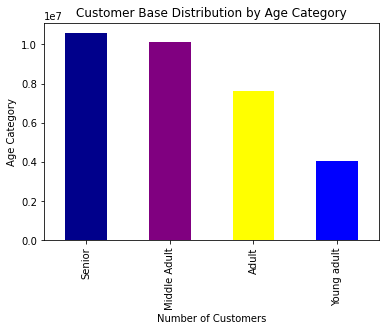

In [44]:
## Create Bar Chart for Profile - 'Age_category'

bar_age_ctgry = df_ords_prods_custmrs['Age_category'].value_counts().plot.bar(color=['darkblue', 'purple','yellow', 'blue'])

plt.title('Customer Base Distribution by Age Category')
plt.xlabel('Number of Customers')
plt.ylabel('Age Category')
plt.show()

## Export the bar chart as a PNG image
                                    
bar_age_ctgry.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_age_distribution.png'))


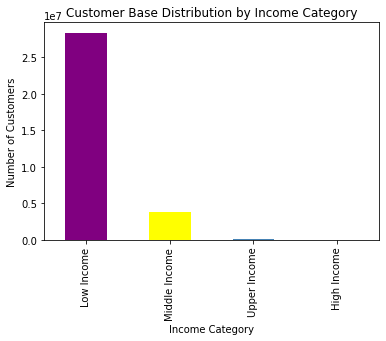

In [45]:
## Create the bar chart 'Income_category'

bar_income_ctgry = df_ords_prods_custmrs['Income_category'].value_counts().plot.bar(color = ['purple','yellow', 'steelblue', 'cornflowerblue'])

# Add labels and title
plt.title('Customer Base Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')

# Export the bar chart as a PNG file

bar_income_ctgry.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_base_income.png'))

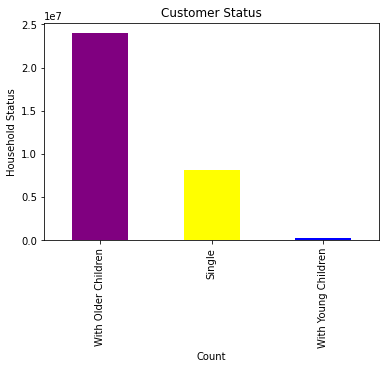

In [46]:
## Create the value counts for the Status column

status_counts = df_ords_prods_custmrs['Household Status'].value_counts().plot.bar(color = ['purple', 'yellow', 'blue'])

## Set the title and axis labels
plt.title('Customer Status')
plt.xlabel('Count')
plt.ylabel('Household Status')

## Export the bar chart as a PNG file

status_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_householde_status.png'))

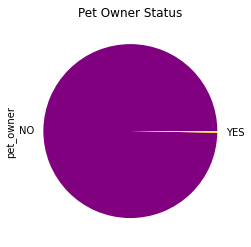

In [47]:
## Create the value counts for the 'pet_owner' column
pet_owner_counts = df_ords_prods_custmrs['pet_owner'].value_counts().plot.pie(labels=['NO', 'YES'], colors=['purple','yellow'])

## Set the title
plt.title('Pet Owner Status')

## Export the Pie chart as a PNG file

pet_owner_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Pet_Owner_Status.png'))

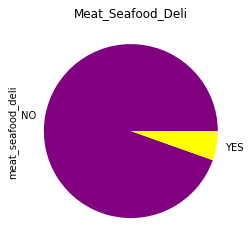

In [48]:
## Create the value counts for the meat_seafood_deli column
meat_seafood_deli_counts = df_ords_prods_custmrs['meat_seafood_deli'].value_counts().plot.pie(labels=['NO', 'YES'], colors=['purple','yellow'])

## Set the title
plt.title('Meat_Seafood_Deli')

## Export the Pie chart as a PNG file

meat_seafood_deli_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Meat_Seafood_Deli'))

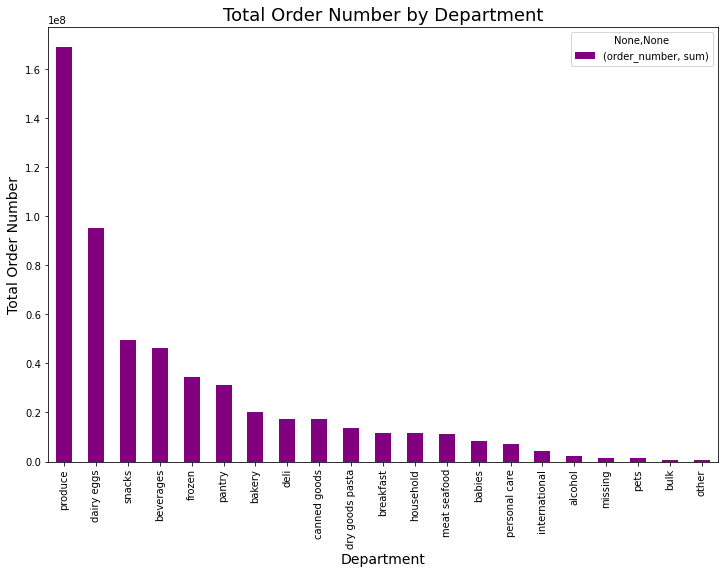

In [55]:
## Create the value counts for the "department_order" column
department_order = df_ords_prods_custmrs.groupby('department').agg({'order_number': ['sum']})

# Sort the dataframe in descending order of the total order number
department_order = department_order.sort_values(('order_number', 'sum'), ascending=False)


## Plot the bar chart
ax = department_order.plot(kind='bar', figsize=(12,8),color='purple')


## Set the chart title and axis labels
ax.set_title('Total Order Number by Department', fontsize=18)
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Total Order Number', fontsize=14)

## Export the bar chart as a PNG file
department_order_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Total Order number for each department.png'))

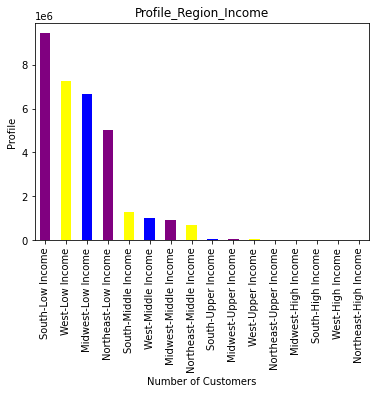

In [56]:
## Create the value counts for the 'Profile_Region_Income'

profile_Region_counts = df_ords_prods_custmrs['Profile_Region_Income'].value_counts().plot.bar(color = ['purple', 'yellow', 'blue'])

## Set the title and axis labels
plt.title('Profile_Region_Income')
plt.xlabel('Number of Customers')
plt.ylabel('Profile')

## Export the bar chart as a PNG file

profile_Region_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Profile_Region_Income.png'))



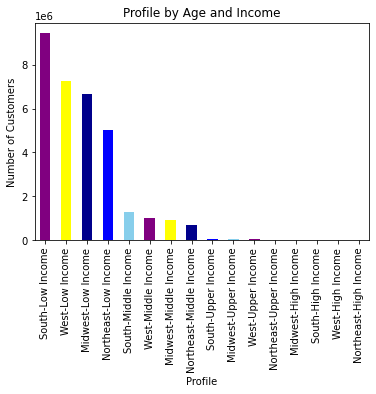

In [57]:
## Create the value counts for the "Profile_Age_Income column'

profile_age_income_counts = df_ords_prods_custmrs['Profile_Region_Income'].value_counts().plot.bar(color = ['purple', 'yellow','darkblue', 'blue', 'skyblue'])

## Set the title and axis labels
plt.title('Profile by Age and Income')
plt.xlabel('Profile')
plt.ylabel('Number of Customers')

## Export the bar chart as a PNG file

profile_age_income_counts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','profile_age_income.png'))


### 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [58]:
## Age Profile Usage Frequency Aggregation

age_usage_agg = df_ords_prods_custmrs.groupby('Age_category').agg({'days_since_prior_order':['mean', 'min','max']})

age_usage_agg

days_since_prior_order           
                               mean  min   max
Age_category                                  
Adult                     11.118677  0.0  30.0
Middle Adult              11.119174  0.0  30.0
Senior                    11.083299  0.0  30.0
Young adult               11.093030  0.0  30.0

In [54]:
## Age Profile Expenditure Aggregation

age_prices_agg = df_ords_prods_custmrs.groupby('Age_category').agg({'prices':['mean', 'min','max']})

age_prices_agg

prices              
                   mean  min      max
Age_category                         
Adult         12.037249  1.0  99999.0
Middle Adult  11.999742  1.0  99999.0
Senior        11.845923  1.0  99999.0
Young adult   12.175118  1.0  99999.0

In [55]:
## Income Profile Usage Frequency Aggregation

income_usage_agg = df_ords_prods_custmrs.groupby('Income_category').agg({'days_since_prior_order':['mean', 'min','max']})

income_usage_agg

days_since_prior_order           
                                  mean  min   max
Income_category                                  
High Income                  10.906074  0.0  30.0
Low Income                   11.127392  0.0  30.0
Middle Income                10.975458  0.0  30.0
Upper Income                 10.034295  0.0  30.0

In [56]:
## Income Profile Expenditure Aggregation

income_prices_agg = df_ords_prods_custmrs.groupby('Income_category').agg({'prices':['mean', 'min','max']})

income_prices_agg

prices              
                       mean  min      max
Income_category                          
High Income      203.045259  1.0  99999.0
Low Income         8.992275  1.0  99999.0
Middle Income     22.807238  1.0  99999.0
Upper Income     274.430112  1.0  99999.0

In [58]:
## Status Profile Usage Frequency Aggregation

household_status_usage_agg = df_ords_prods_custmrs.groupby('Household Status').agg({'days_since_prior_order':['mean', 'min','max']})
household_status_usage_agg

days_since_prior_order           
                                      mean  min   max
Household Status                                     
Single                           11.080805  0.0  30.0
With Older Children              11.127201  0.0  30.0
With Young Children               9.963975  0.0  30.0

In [60]:
## Status Profile Expenditure Aggregation

household_status_prices_agg = df_ords_prods_custmrs.groupby('Household Status').agg({'prices':['mean', 'min','max']})

household_status_prices_agg

prices              
                          mean  min      max
Household Status                            
Single               12.129243  1.0  99999.0
With Older Children  11.987192  1.0  99999.0
With Young Children   7.650679  1.0     15.0

In [61]:
## Pet_Owner Profile Usage Frequency Aggregation

pet_owner_usage_agg = df_ords_prods_custmrs.groupby('pet_owner').agg({'days_since_prior_order':['mean', 'min','max']})

pet_owner_usage_agg

days_since_prior_order           
                            mean  min   max
pet_owner                                  
NO                     11.101780  0.0  30.0
YES                    11.867322  0.0  30.0

In [62]:
## Pet_Owner Profile Expenditure Aggregation

pet_owner_prices_agg = df_ords_prods_custmrs.groupby('pet_owner').agg({'prices':['mean', 'min','max']})
pet_owner_prices_agg

prices              
               mean  min      max
pet_owner                        
NO         11.99260  1.0  99999.0
YES         7.88907  1.0     15.0

In [63]:
## Meat_seafood_Deli Profile Usage Frequency Aggregation

meat_seafood_deli_usage_agg = df_ords_prods_custmrs.groupby('meat_seafood_deli').agg({'days_since_prior_order':['mean', 'min','max']})

meat_seafood_deli_usage_agg

days_since_prior_order           
                                    mean  min   max
meat_seafood_deli                                  
NO                             11.088254  0.0  30.0
YES                            11.380437  0.0  30.0

In [64]:
 ## Meat_seafood_Deli Profile Expenditure Aggregation

meat_seafood_deli_prices_agg = df_ords_prods_custmrs.groupby('meat_seafood_deli').agg({'prices':['mean', 'min','max']})

meat_seafood_deli_prices_agg

prices              
                        mean  min      max
meat_seafood_deli                         
NO                 12.024553  1.0  99999.0
YES                11.208494  1.0     25.0

In [65]:
## Income Profile_Region_Income Usage Frequency Aggregation

Profile_Region_Income_usage_agg = df_ords_prods_custmrs.groupby('Profile_Region_Income').agg({'days_since_prior_order':['mean', 'min','max']})

Profile_Region_Income_usage_agg

days_since_prior_order           
                                          mean  min   max
Profile_Region_Income                                    
Midwest-High Income                   9.708746  0.0  30.0
Midwest-Low Income                   11.204048  0.0  30.0
Midwest-Middle Income                11.079946  0.0  30.0
Midwest-Upper Income                 10.155613  0.0  30.0
Northeast-High Income                10.762969  0.0  30.0
Northeast-Low Income                 11.085385  0.0  30.0
Northeast-Middle Income              11.021301  0.0  30.0
Northeast-Upper Income               10.661515  0.0  30.0
South-High Income                    11.963329  0.0  30.0
South-Low Income                     11.136341  0.0  30.0
South-Middle Income                  10.949984  0.0  30.0
South-Upper Income                    9.769046  0.0  30.0
West-High Income                     12.232783  0.0  30.0
West-Low Income                      11.074598  0.0  30.0
West-Middle Income                   10.883097  0.0  30.0
West-Upper Income                     9.868997  0.0  30.0

In [66]:
## Income Profile_Region_Income Expenditure Aggregation

Profile_Region_Income_prices_agg = df_ords_prods_custmrs.groupby('Profile_Region_Income').agg({'prices':['mean', 'min','max']})

Profile_Region_Income_prices_agg

prices              
                               mean  min      max
Profile_Region_Income                            
Midwest-High Income      172.517988  1.0  99999.0
Midwest-Low Income         9.196787  1.0  99999.0
Midwest-Middle Income     26.979579  1.0  99999.0
Midwest-Upper Income     253.039251  1.0  99999.0
Northeast-High Income    206.662272  1.0  99999.0
Northeast-Low Income       8.940520  1.0  99999.0
Northeast-Middle Income   21.452952  1.0  99999.0
Northeast-Upper Income   248.859440  1.0  99999.0
South-High Income        276.997072  1.0  99999.0
South-Low Income           9.089707  1.0  99999.0
South-Middle Income       21.548379  1.0  99999.0
South-Upper Income       323.801874  1.0  99999.0
West-High Income         179.923104  1.0  99999.0
West-Low Income            8.713585  1.0  99999.0
West-Middle Income        21.564749  1.0  99999.0
West-Upper Income        240.230765  1.0  99999.0

In [67]:
## Income Profile_Age_Income Usage Frequency Aggregation

Profile_Age_Income_usage_agg = df_ords_prods_custmrs.groupby('Profile_Age_Income').agg({'days_since_prior_order':['mean', 'min','max']})

Profile_Age_Income_usage_agg

days_since_prior_order           
                                             mean  min   max
Profile_Age_Income                                          
Adult-Low Income                        11.122572  0.0  30.0
Adult-Middle Income                     10.379292  0.0  30.0
Adult-Upper Income                      11.530857  0.0  30.0
Middle Adult-High Income                11.338763  0.0  30.0
Middle Adult-Low Income                 11.162750  0.0  30.0
Middle Adult-Middle Income              10.973436  0.0  30.0
Middle Adult-Upper Income                9.626017  0.0  30.0
Senior-High Income                      10.495281  0.0  30.0
Senior-Low Income                       11.108537  0.0  30.0
Senior-Middle Income                    11.011015  0.0  30.0
Senior-Upper Income                      9.850207  0.0  30.0
Young adult-Low Income                  11.104480  0.0  30.0
Young adult-Middle Income                9.745842  0.0  30.0
Young adult-Upper Income                10.273927  0.0  30.0

In [68]:
# Income Profile_Age_Income Expenditure Aggregation

Profile_Age_Income_prices_agg = df_ords_prods_custmrs.groupby('Profile_Age_Income').agg({'prices':['mean', 'min','max']})

Profile_Age_Income_prices_agg

prices              
                                  mean  min      max
Profile_Age_Income                                  
Adult-Low Income              9.092892  1.0  99999.0
Adult-Middle Income         326.885168  1.0  99999.0
Adult-Upper Income          314.752077  1.0  99999.0
Middle Adult-High Income    242.549889  1.0  99999.0
Middle Adult-Low Income       8.738032  1.0  99999.0
Middle Adult-Middle Income   17.172716  1.0  99999.0
Middle Adult-Upper Income   256.352446  1.0  99999.0
Senior-High Income          165.166010  1.0  99999.0
Senior-Low Income             8.873387  1.0  99999.0
Senior-Middle Income         16.642812  1.0  99999.0
Senior-Upper Income         270.186766  1.0  99999.0
Young adult-Low Income        9.577912  1.0  99999.0
Young adult-Middle Income   282.057151  1.0  99999.0
Young adult-Upper Income    315.655926  1.0  99999.0

### 9. Compare your customer profiles with regions and departments and other  visualizations chart.

In [69]:
## 1. Shopping habits Order Day of Week by Age Category 

Age_odow_habits = pd.crosstab(df_ords_prods_custmrs['order_day_of_week'], df_ords_prods_custmrs['Age_category'])

## Check Output

Age_odow_habits

Age_category,Adult,Middle Adult,Senior,Young adult
order_day_of_week,,,,
0,1472066,1936838,2022549,772729
1,1345185,1767787,1837572,709686
2,985375,1330527,1374876,523052
3,901344,1200549,1262438,476203
4,894438,1183969,1233191,472204
5,985978,1316584,1375608,527621
6,1040471,1415720,1476605,563694


### Legend: 
      0 = Saturday            
      1 = Sunday               
      2 = Monday               
      3 = Tuesday
      4 = Wednesday
      5 = Thursday
      6 = Friday 

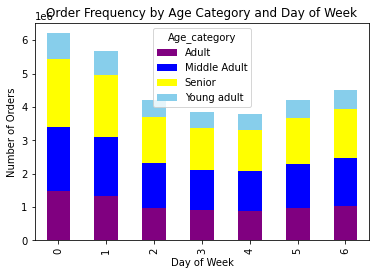

In [172]:
## Create a Stacked Bar for Age Category Profile of Shopping habits- Order Day of Week

Age_odow_habits.plot(kind='bar', stacked= True, color=['purple', 'blue', 'yellow', 'skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency by Age Category and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_odow_habits_bar.png'))


In [60]:
## 2. Shopping habits Region by Age Category 

Age_region_habits = pd.crosstab(df_ords_prods_custmrs['Region'], df_ords_prods_custmrs['Age_category'])

## Check Output

Age_region_habits

Age_category,Adult,Middle Adult,Senior,Young adult
Region,,,,
Midwest,1774944,2417588,2465259,939534
Northeast,1334736,1782696,1894192,711112
South,2573379,3323753,3518088,1376665
West,1941798,2627937,2705300,1017878


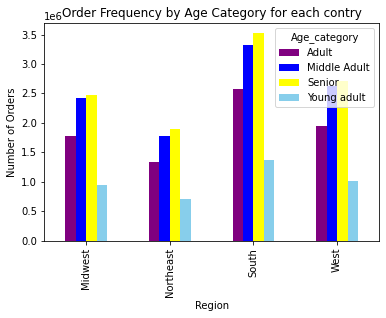

In [62]:
## Create a Stacked Bar for Age Category Profile of Shopping habits for each Region

Age_region_habits.plot(kind='bar', color=['purple', 'blue', 'yellow', 'skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency by Age Category for each contry')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_region_habits.png'))

In [64]:
## 3. Loyalty buyer by Age Category and Check Output

Age_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['Age_category'])

Age_loyalty

Age_category,Adult,Middle Adult,Senior,Young adult
loyalty_flag,,,,
Loyal customer,2393708,3245250,3364684,1280451
New customer,1455629,1958399,2049433,780529
Regular customer,3775520,4948325,5168722,1984209


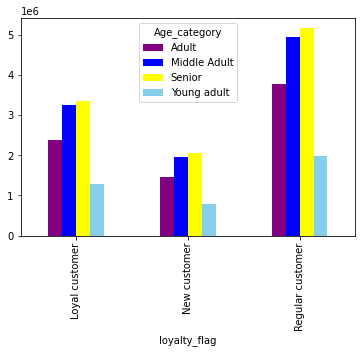

In [66]:
## Create a Stacked Bar for Age Category of Loyalty Buyers

age_loyalty = Age_loyalty.plot(kind = 'bar', color = ['purple', 'blue', 'yellow', 'skyblue', 'grey'])

## Export the Stacked Bar

age_loyalty = age_loyalty.get_figure()
age_loyalty.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age Category of Loyalty Buyers.png'))


In [76]:
## 4.Shopping habits Income_Category by Age Category 

Age_income_habits = pd.crosstab(df_ords_prods_custmrs['Income_category'], df_ords_prods_custmrs['Age_category'])

## Check Output

Age_income_habits

Age_category,Adult,Middle Adult,Senior,Young adult
Income_category,,,,
High Income,0,13913,14510,0
Low Income,7553421,8205995,8586715,4007888
Middle Income,50707,1875358,1927209,27109
Upper Income,20729,56708,54405,10192


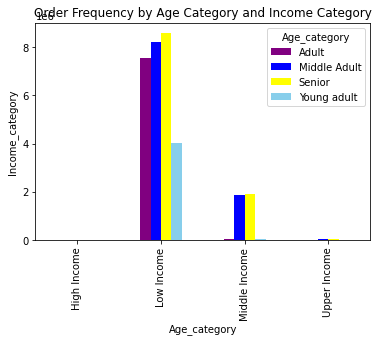

In [181]:
## Create a Stacked Bar for Age Category Profile of Shopping habits (Income_category)

Age_income_habits.plot(kind='bar', color=['purple', 'blue', 'yellow', 'skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency by Age Category and Income Category')
plt.xlabel('Age_category')
plt.ylabel('Income_category')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','age_income_haibits.png'))

In [75]:
## 5.Shopping habits Department by Age Category 

Age_department_habits = pd.crosstab(df_ords_prods_custmrs['department'], df_ords_prods_custmrs['Age_category'])

## Check Output

Age_department_habits

Age_category,Adult,Middle Adult,Senior,Young adult
department,,,,
alcohol,36832,47920,48533,20411
babies,99752,134015,137024,53011
bakery,275016,368275,382711,146426
beverages,624169,847867,883000,333087
breakfast,164289,221093,228137,89514
bulk,8086,10774,11291,4422
canned goods,252733,334006,347829,133490
dairy eggs,1277757,1686118,1760012,674860
deli,247798,328560,344391,130500


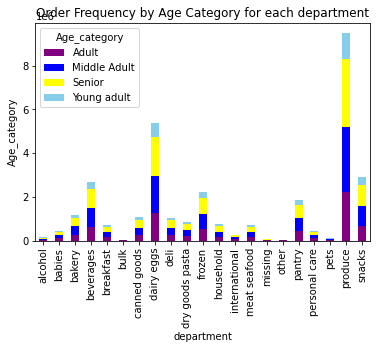

In [78]:
## Create a Stacked Bar for Shopping habits Department by Age Category 

Age_department_habits.plot(kind='bar', stacked = True, color=['purple', 'blue', 'yellow', 'skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency by Age Category for each department')
plt.xlabel('department')
plt.ylabel('Age_category')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Age_department_habits.png'))

In [68]:
## 6. Shopping habits (Order Day of Week) by Income_category 

Income_odow_habits = pd.crosstab(df_ords_prods_custmrs['order_day_of_week'], df_ords_prods_custmrs['Income_category'])

## Check Output

Income_odow_habits

Income_category,High Income,Low Income,Middle Income,Upper Income
order_day_of_week,,,,
0,5078,5418366,758573,22165
1,4918,4963543,665930,25839
2,3803,3693881,496865,19281
3,4022,3362503,455662,18347
4,3348,3310287,451521,18646
5,3608,3683711,497134,21338
6,3646,3921728,554698,16418


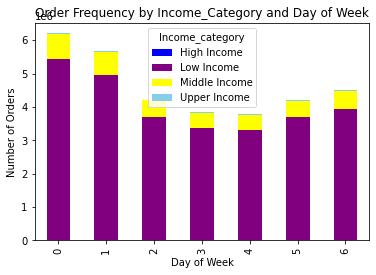

In [70]:
## Create a Stacked Bar for Income Category Profile of Shopping habits (Order Day of Week)

Income_odow_habits.plot(kind='bar', stacked=True, color=['blue','purple', 'yellow', 'skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency by Income_Category and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_odow_habits.png'))



In [72]:
## 7. Shopping habits Income Category for each Region

Income_region_habits = pd.crosstab(df_ords_prods_custmrs['Income_category'], df_ords_prods_custmrs['Region'])

## Check Output
Income_region_habits

Region,Midwest,Northeast,South,West
Income_category,,,,
High Income,11280,4885,6285,5973
Low Income,6641911,5015998,9449830,7246280
Middle Income,908298,678924,1285506,1007655
Upper Income,35836,22929,50264,33005


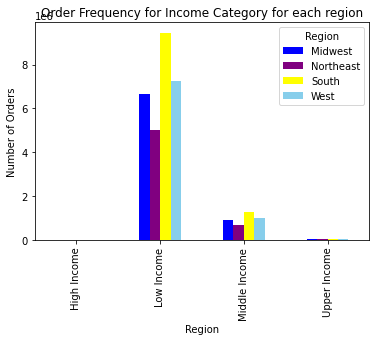

In [74]:
## Create a Stacked Bar for shopping habits Income Category for each Region

Income_region_habits.plot(kind='bar', color=['blue','purple','yellow', 'skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency for Income Category for each region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_region_habits.png'))

In [110]:
## 8. Loyalty buyer by Income Category and Check Output

Income_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['Income_category'])

Income_loyalty

Income_category,High Income,Low Income,Middle Income,Upper Income
loyalty_flag,,,,
Loyal customer,8139,8973152,1243810,58992
New customer,2753,5512412,714720,14105
Regular customer,17531,13868455,1921853,68937


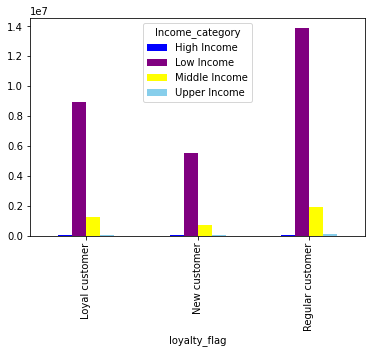

In [185]:
## Create a Stacked Bar for Age Category of Loyalty Buyers

income_loyalty = Income_loyalty.plot(kind = 'bar', color = ['blue', 'purple','yellow', 'skyblue', 'grey'])

## Export the Stacked Bar

fig_income_loyalty = income_loyalty.get_figure()
fig_income_loyalty.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_loyalty.png'))


In [87]:
## 9.Income Category for each Department and Check Output

department_loyalty = pd.crosstab(df_ords_prods_custmrs['department' ], df_ords_prods_custmrs['loyalty_flag'])

department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


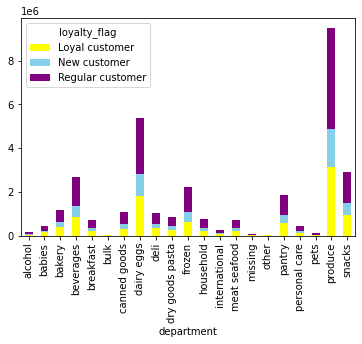

In [88]:
## Create a Stacked Bar for Department by Income Category and Check Output

department_loyalty = department_loyalty.plot(kind = 'bar', stacked= True, color = ['yellow', 'skyblue','purple'])

## Export the Stacked Bar

department_loyalty = department_loyalty.get_figure()
department_loyalty.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_loyalty.png'))


In [116]:
## 10. Shopping habits (Order Day of Week) by Household Status

household_status_odow_habits = pd.crosstab(df_ords_prods_custmrs['order_day_of_week'], df_ords_prods_custmrs['Household Status'])

## Check Output

household_status_odow_habits

Household Status,Single,With Older Children,With Young Children
order_day_of_week,,,
0,1550309,4593294,60579
1,1424767,4180959,54504
2,1049129,3121924,42777
3,959353,2842054,39127
4,945205,2800008,38589
5,1057145,3109954,38692
6,1111595,3341855,43040


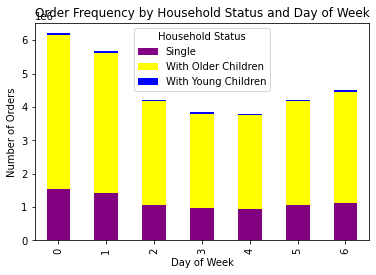

In [186]:
## Create a Stacked Bar for Household Status Profile of Shopping habits (Order Day of Week)

household_status_odow_habits.plot(kind='bar', stacked=True, color=['purple', 'yellow','blue','skyblue', 'grey'])

## Set the title and axis labels
plt.title('Order Frequency by Household Status and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_odow_habits.png'))

In [89]:
## 11. Shopping habits department by Household Status

household_status_department_habits = pd.crosstab(df_ords_prods_custmrs['department'], df_ords_prods_custmrs['Household Status'])

## Check Output

household_status_department_habits

Household Status,Single,With Older Children,With Young Children
department,,,
alcohol,39118,114578,0
babies,106494,0,317308
bakery,294405,878023,0
beverages,674442,2013681,0
breakfast,174577,528456,0
bulk,8278,26295,0
canned goods,264838,803220,0
dairy eggs,1349362,4049385,0
deli,265145,786104,0


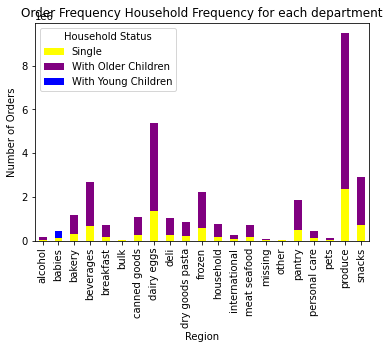

In [90]:
## Create a Stacked Bar for Household Status Profile of Shopping habits for each department
household_status_department_habits.plot(kind='bar', stacked=True, color=['yellow','purple','blue'])

## Set the title and axis labels
plt.title('Order Frequency Household Frequency for each department')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_department_habit.png'))

In [122]:
## 12. Loyalty buyer by Household Status and Check Output

household_status_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['Household Status'])

household_status_loyalty

Household Status,Single,With Older Children,With Young Children
loyalty_flag,,,
Loyal customer,2588844,7571007,124242
New customer,1559087,4640177,44726
Regular customer,3949572,11778864,148340


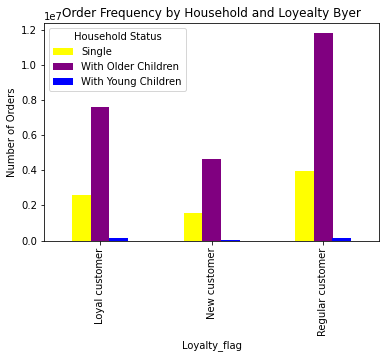

In [187]:
## Create a Charter Bar for Household Status Profile of Loyalty Byer
household_status_loyalty.plot(kind='bar', color=['yellow','purple','blue'])

## Set the title and axis labels
plt.title('Order Frequency by Household and Loyealty Byer')
plt.xlabel('Loyalty_flag')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_loyalty.png'))

In [91]:
## 13. Household Status for each Region and Check Output

household_status_region = pd.crosstab(df_ords_prods_custmrs['Region'], df_ords_prods_custmrs['Household Status'])

household_status_region

Household Status,Single,With Older Children,With Young Children
Region,,,
Midwest,1905200,5618531,73594
Northeast,1418301,4247814,56621
South,2701659,7982917,107309
West,2072343,6140786,79784


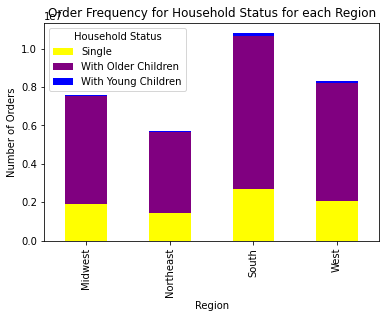

In [93]:
## Create a Charter Bar for Household Status for each Region and Check Output
household_status_region.plot(kind='bar', stacked= True, color=['yellow','purple','blue'])

## Set the title and axis labels
plt.title('Order Frequency for Household Status for each Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_region.png'))

In [127]:
## 14. Shopping habits (Order Day of Week) by Pet Owner

pet_owner_odow_habits = pd.crosstab(df_ords_prods_custmrs['order_day_of_week'], df_ords_prods_custmrs['pet_owner'])

## Check Output

pet_owner_odow_habits

pet_owner,NO,YES
order_day_of_week,,
0,6187033,17149
1,5645704,14526
2,4201907,11923
3,3827948,12586
4,3771386,12416
5,4192087,13704
6,4481078,15412


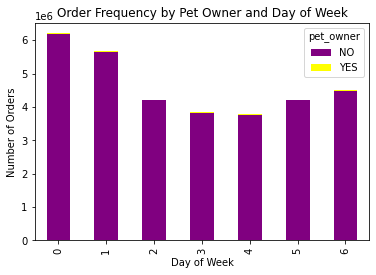

In [188]:
## Create a Stacked Bar for Pet Owner Profile of Shopping habits (Order Day of Week)

pet_owner_odow_habits.plot(kind='bar', stacked=True, color=['purple', 'yellow'])

## Set the title and axis labels
plt.title('Order Frequency by Pet Owner and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_odow_habits.png'))

In [20]:
## 15. Shopping habits Region by Pet Owner

pet_owner_region_habits = pd.crosstab(df_ords_prods_custmrs['Region'], df_ords_prods_custmrs['pet_owner'])

## Check Output

pet_owner_region_habits

pet_owner,NO,YES
Region,,
Midwest,7574970,22355
Northeast,5704135,18601
South,10760616,31269
West,8267422,25491


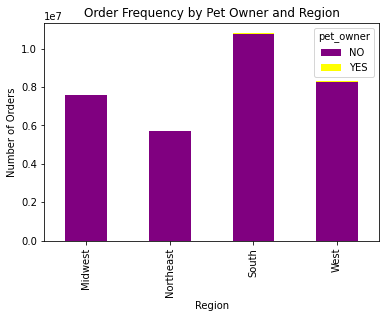

In [21]:
 ## Create a Stacked Bar for Pet Owner Profile of Shopping habits for each region
    
pet_owner_region_habits.plot(kind='bar', stacked=True, color=['purple', 'yellow'])

## Set the title and axis labels
plt.title('Order Frequency by Pet Owner and Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_region_habits.png'))

In [134]:
## 16. Loyalty buyer by Pet Owner and Check Output

pet_owner_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['pet_owner'])
pet_owner_loyalty

pet_owner,NO,YES
loyalty_flag,,
Loyal customer,10258624,25469
New customer,6223454,20536
Regular customer,15825065,51711


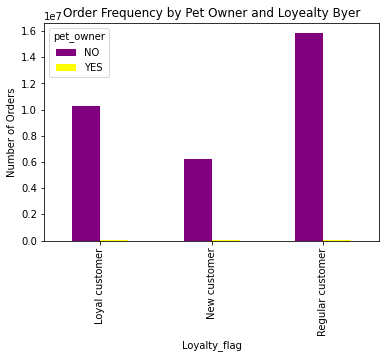

In [136]:
## Create a Charter Bar for Household Status Profile of Loyalty Byer
pet_owner_loyalty.plot(kind='bar', color=['purple','yellow'])

## Set the title and axis labels
plt.title('Order Frequency by Pet Owner and Loyealty Byer')
plt.xlabel('Loyalty_flag')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_loyalty..png'))

In [96]:
## 17. Department by Pet Owner and Check Output

pet_owner_department = pd.crosstab(df_ords_prods_custmrs['department'], df_ords_prods_custmrs['pet_owner'])
pet_owner_department

pet_owner,NO,YES
department,,
alcohol,153696,0
babies,423802,0
bakery,1172428,0
beverages,2688123,0
breakfast,703033,0
bulk,34573,0
canned goods,1068058,0
dairy eggs,5398747,0
deli,1051249,0


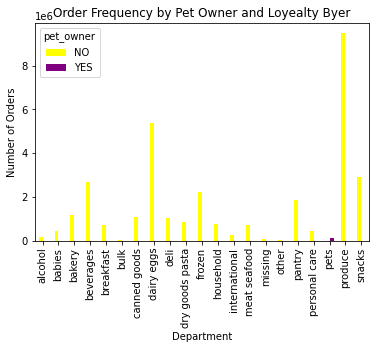

In [98]:
## Create a Charter Bar for epartment by Pet Owner and Check Output
pet_owner_department.plot(kind='bar', color=['yellow','purple'])

## Set the title and axis labels
plt.title('Order Frequency by Pet Owner and Loyealty Byer')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_department.png'))

In [137]:
## 18. Shopping habits (Order Day of Week) by Meat_seafood_deli

meat_seafood_deli_odow_habits = pd.crosstab(df_ords_prods_custmrs['order_day_of_week'], df_ords_prods_custmrs['meat_seafood_deli'])

## Check Output

meat_seafood_deli_odow_habits

meat_seafood_deli,NO,YES
order_day_of_week,,
0,5843241,360941
1,5356452,303778
2,3991419,222411
3,3640452,200082
4,3587226,196576
5,3983394,222397
6,4242499,253991


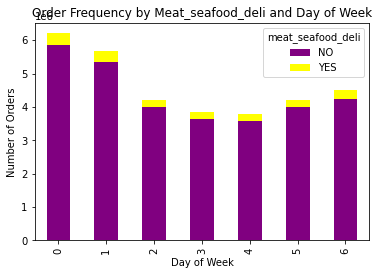

In [138]:
## Create a Stacked Bar for Meat_seafood_deli Profile of Shopping habits (Order Day of Week)

meat_seafood_deli_odow_habits.plot(kind='bar', stacked=True, color=['purple', 'yellow'])

## Set the title and axis labels
plt.title('Order Frequency by Meat_seafood_deli and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_seafood_deli_odow_habits.png'))

In [100]:
## 19. Shopping habits Region by Meat_seafood_deli

meat_seafood_deli_region_habits = pd.crosstab(df_ords_prods_custmrs['Region'], df_ords_prods_custmrs['meat_seafood_deli'])

## Check Output

meat_seafood_deli_region_habits

meat_seafood_deli,NO,YES
Region,,
Midwest,7185518,411807
Northeast,5411299,311437
South,10206714,585171
West,7841152,451761


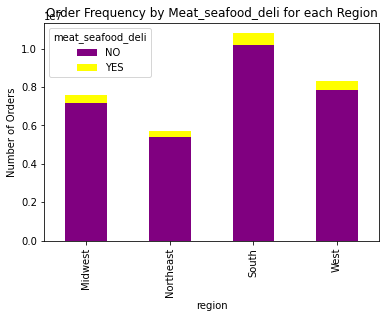

In [101]:
 ## Create a Stacked Bar for Meat_seafood_deli Profile of Shopping habits (Order Hour of Day)
meat_seafood_deli_region_habits.plot(kind='bar', stacked=True, color=['purple', 'yellow'])

## Set the title and axis labels
plt.title('Order Frequency by Meat_seafood_deli for each Region')
plt.xlabel('region')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_seafood_deli_region_habits.png'))

In [141]:
## 20. Loyalty buyer by Meat_seafood_deli and Check Output

meat_seafood_deli_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['meat_seafood_deli'])
meat_seafood_deli_loyalty

meat_seafood_deli,NO,YES
loyalty_flag,,
Loyal customer,9757567,526526
New customer,5891630,352360
Regular customer,14995486,881290


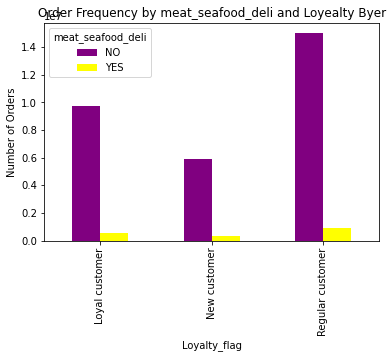

In [142]:
## Create a Charter Bar for meat_seafood_deli Profile of Loyalty Byer

meat_seafood_deli_loyalty.plot(kind='bar', color=['purple','yellow'])

## Set the title and axis labels
plt.title('Order Frequency by meat_seafood_deli and Loyealty Byer')
plt.xlabel('Loyalty_flag')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_seafood_deli.png'))

In [109]:
## 21.Region by department and Check Output

department_region = pd.crosstab(df_ords_prods_custmrs['department'], df_ords_prods_custmrs['Region'])


department_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


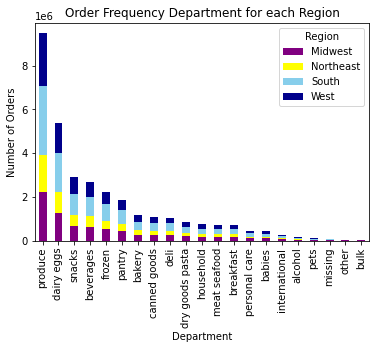

In [117]:
## Sort the crosstab table in descending order by the total order count per department

department_region_sorted = department_region.loc[department_region.sum(axis=1).sort_values(ascending=False).index]

## Create a stacked bar chart for each region and department
department_region_sorted.plot(kind='bar', stacked=True, color=['purple','yellow', 'skyblue', 'darkblue'])

## Set the title and axis labels
plt.title('Order Frequency Department for each Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

# Export the stacked chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region.png'))


In [120]:
## 22.Loyalty _flag by department and Check Output

department_Loyalty_flag = pd.crosstab(df_ords_prods_custmrs['department'], df_ords_prods_custmrs['loyalty_flag'])


department_Loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


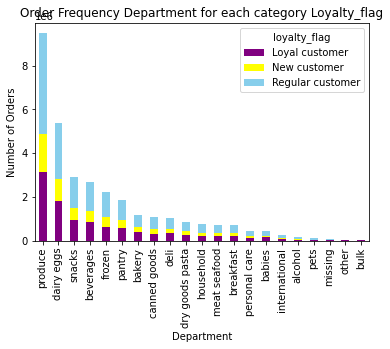

In [121]:
## Sort the crosstab table in descending order by the total order count per department

department_Loyalty_flag_sorted = department_Loyalty_flag.loc[department_Loyalty_flag.sum(axis=1).sort_values(ascending=False).index]

## Create a stacked bar chart for each Loyalty_flag and department
department_Loyalty_flag_sorted.plot(kind='bar', stacked=True, color=['purple','yellow', 'skyblue'])

## Set the title and axis labels
plt.title('Order Frequency Department for each category Loyalty_flag')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

# Export the stacked chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_Loyalty.png'))


In [76]:
## 23. Loyalty buyer by Region and Check Output

region_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['Region'])

region_loyalty

Region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2373774,1841785,3405844,2662690
New customer,1472573,1100207,2074410,1596800
Regular customer,3750978,2780744,5311631,4033423


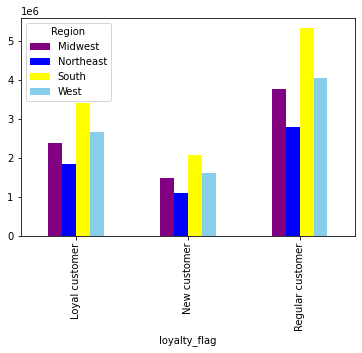

In [77]:
## Create a Stacked Bar for Region of Loyalty Buyers

stacked_region_loyalty = region_loyalty.plot(kind = 'bar', color = ['purple', 'blue', 'yellow', 'skyblue', 'grey'])

## Export the Stacked Bar

fig = stacked_region_loyalty.get_figure()
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty Buyers by Region.png'))


In [88]:
## 24.Loyalty buyer by Speding_flag and Check Output

spending_flag_loyalty = pd.crosstab(df_ords_prods_custmrs['loyalty_flag'], df_ords_prods_custmrs['spending_flag']) 

spending_flag_loyalty

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


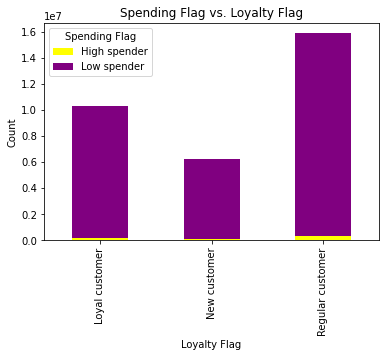

In [99]:
## Create the stacked bar chart
spending_flag_loyalty.plot(kind='bar', stacked=True, color=['yellow', 'purple'])

## Add labels and title
plt.title('Spending Flag vs. Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.legend(title='Spending Flag')

## Export Stacked Charter
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Spending Flag vs. Loyalty Flag.png'))

In [95]:
## 25. Busiest day in each Region

busiest_day_region = pd.crosstab(df_ords_prods_custmrs['Busiest day'], df_ords_prods_custmrs['Region'])

## Check Output
busiest_day_region

Region,Midwest,Northeast,South,West
Busiest day,,,,
Busiest day,1460186,1097258,2052776,1593962
Least busy,888131,666326,1258537,970808
Regularly busy,5249008,3959152,7480572,5728143


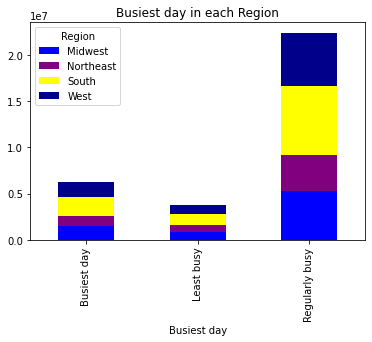

In [101]:
## Create the stacked bar chart
busiest_day_region.plot(kind='bar', stacked=True, color=['blue', 'purple','yellow', 'darkblue','grey'])

## Add labels and title
plt.title('Busiest day in each Region')
plt.xlabel('Busiest day')

## Export Stacked Charter
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','Busiest day in each Region.png'))


In [161]:
## 26.Activity_flag by region

activity_flag_region = pd.crosstab(df_ords_prods_custmrs['activity_flag'], df_ords_prods_custmrs['Region'])
activity_flag_region

Region,Midwest,Northeast,South,West
activity_flag,,,,
High-activity customers,5711756,4315271,8129086,6258764
Low-activity customers,1885569,1407465,2662799,2034149


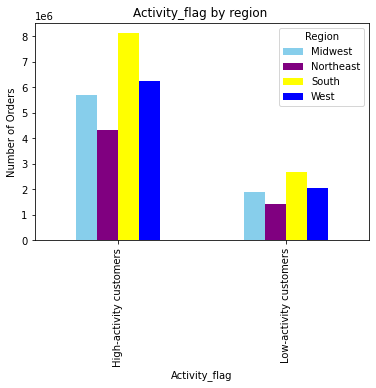

In [163]:
## Create a Charter Bar for Activity_flag by region

activity_flag_region.plot(kind='bar', color=['skyblue', 'purple','yellow','blue'])

## Set the title and axis labels
plt.title('Activity_flag by region ')
plt.xlabel('Activity_flag')
plt.ylabel('Number of Orders')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'activity_flag_region_habits.png'))

In [23]:
df_ords_prods_custmrs['price_range_loc'].value_counts(dropna = False)

NaN                   21104410
Low-range product     10126321
Mid-range product       756450
High-range product      417678
Name: price_range_loc, dtype: int64

In [24]:
## 27.Group the data frame by price_range and sum the order_number column
df_grouped = df_ords_prods_custmrs.groupby('price_range_loc')['order_number'].sum()

Text(0, 0.5, 'Order Number')

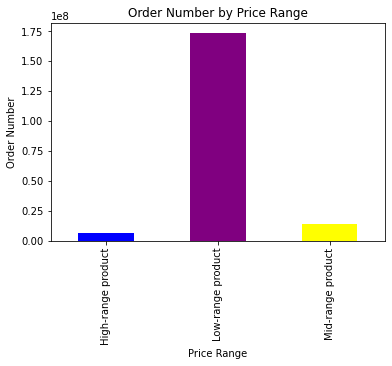

In [25]:
# Define the colors for each price range
colors = ['blue','purple','yellow']

# Plot the results using a bar chart with the specified colors
df_grouped.plot(kind='bar', color=colors)

# Add title and axis labels
plt.title('Order Number by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Order Number')



In [46]:
## 27.  creating a crosstab to compare different orders by region and price range
df_ords_prods_custmrs['price_range_loc'] = df_ords_prods_custmrs['price_range_loc'].astype('category')
crosstab_orders_regions1 = pd.crosstab(df_ords_prods_custmrs['Region'], df_ords_prods_custmrs['price_range_loc'], dropna=False)


In [47]:
crosstab_orders_regions1

price_range_loc,High-range product,Low-range product,Mid-range product
Region,,,
Midwest,97918,2372304,176871
Northeast,73202,1792943,134472
South,139390,3368338,252071
West,107168,2592736,193036


Text(0.5, 1.0, 'Instacart orders by region and price range groupings')

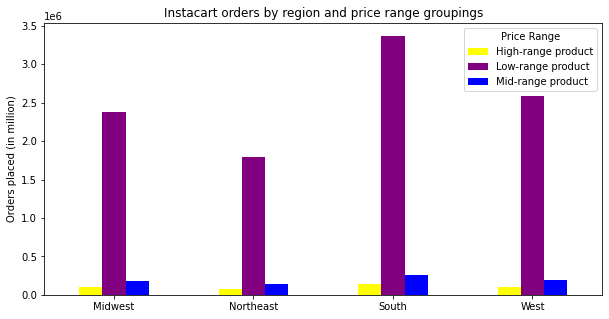

In [48]:
## Creating a bar chart

barchart_price_region1 = crosstab_orders_regions1.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), color=['yellow','purple', 'blue']).legend(title="Price Range", bbox_to_anchor=(1.0,1.0))

plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by region and price range groupings")

In [46]:
## 28. creating a crosstab to compare different orders by de and price ran
price_range_departments = pd.crosstab(df_ords_prods_custmrs['department'], df_ords_prods_custmrs['price_range_loc'], dropna = False)

price_range_departments

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,35243,0
babies,0,125317,0
bakery,0,287938,0
beverages,0,852974,44710
breakfast,0,219333,0
bulk,0,1221,0
canned goods,0,298683,0
dairy eggs,5127,1431016,35369
deli,0,313628,98671


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

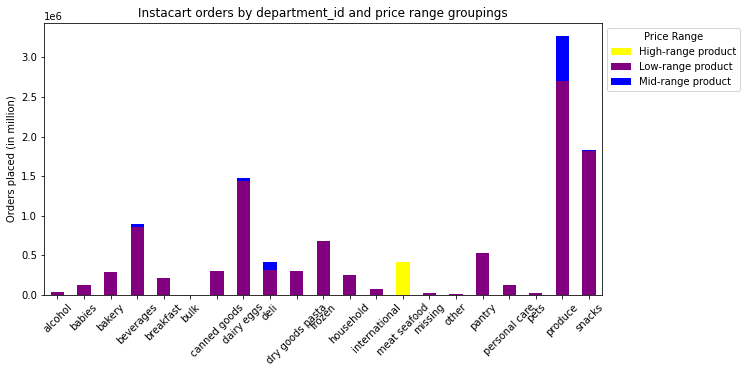

In [55]:
## Create a Bar charter to show the most frequenty departments.

barchartprice_range_departments = price_range_departments.iloc[:,[0,1,2]].plot(kind='bar', stacked=True, rot=0, figsize=(10,5), color=['yellow','purple','blue']).legend(title="Price Range", bbox_to_anchor=(1.0,1.0))

plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title("Instacart orders by department_id and price range groupings")

## Rotate x-tick labels by 45 degrees
plt.xticks(rotation=45)

In [53]:
## 29. create crosstab with row-wise percentage
Profile_Age_Income_departments_pct = pd.crosstab(df_ords_prods_custmrs['Profile_Age_Income'], df_ords_prods_custmrs['department'], normalize='index') * 100


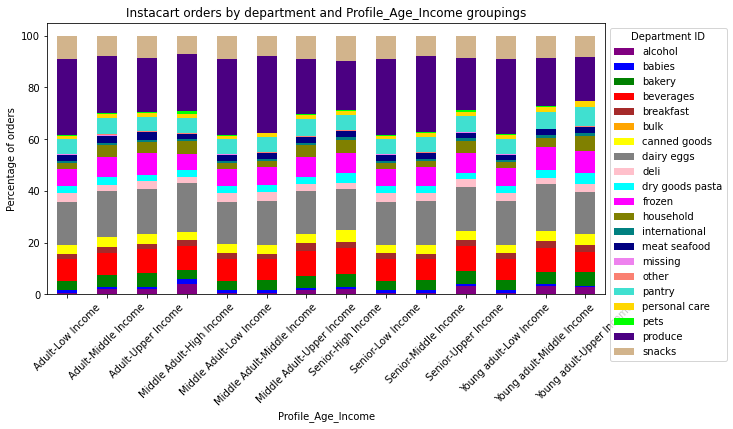

In [55]:
## define color list
colors = ['purple', 'blue', 'green', 'red', 'brown', 'orange', 'yellow', 'gray', 'pink', 'cyan', 'magenta', 'olive', 'teal', 'navy', 'violet', 'salmon', 'turquoise', 'gold', 'lime', 'indigo', 'tan']

## plot stacked bar chart
ax = Profile_Age_Income_departments_pct.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)
ax.legend(title='Department ID', bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Profile_Age_Income')
ax.set_ylabel('Percentage of orders')
ax.set_title('Instacart orders by department and Profile_Age_Income groupings')
plt.xticks(rotation=45)

## Export the chart as a PNG image file
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart orders by department and Profile_Age_Income groupings.png')
plt.savefig(file_path)

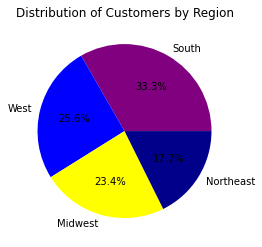

In [25]:
## 30. Get the value counts of 'Region'

region_counts = df_ords_prods_custmrs['Region'].value_counts(dropna=False)

## Define the colors
colors = [ 'purple', 'blue','yellow', 'darkblue']

## Create a pie chart with the specified colors
plt.pie(region_counts, labels=region_counts.index, colors=colors, autopct='%1.1f%%')


## Add a title
plt.title('Distribution of Customers by Region')

# Save the chart as a PNG image file
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution of Customers by Region.png')
plt.savefig(file_path)


In [ ]:
### 31. Cross-tabulation table will show the count of each combination of values of spending_flag and Region

Region_Spending_Habits = pd.crosstab(df_ords_prods_custmrs['spending_flag'], df_ords_prods_custmrs['Region'], dropna = False)

Region_Spending_Habits

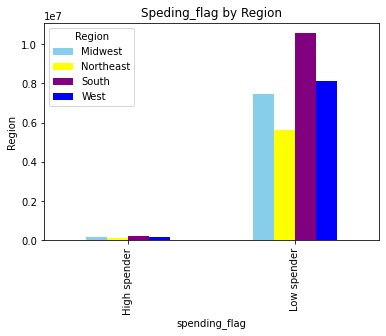

In [58]:
## Create a Charter Bar for spending_flag and Region

Region_Spending_Habits.plot(kind='bar', color=['skyblue','yellow', 'purple','blue'])

## Set the title and axis labels
plt.title('Speding_flag by Region')
plt.xlabel('spending_flag')
plt.ylabel('Region')

## Export Stacked Charter

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Speding_flag by Region.png'))

In [49]:
df_ords_prods_custmrs.shape

(32404859, 36)